# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("insurance.csv")  

print(df.shape)
print(df.dtypes)

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


This is a Medical Insurance Cost Dataset that was found on Kaggle. It contains 1,338 individual records with their demographic, health, and insurance information. The dataset has the following features :[age(N), sex(C), bmi(N), children(N), smoker(C), region(C), charges(N)']. The target, as described by the Kaggle page, is the "charges" that represent the "medical insurance cost billed to the individual". 

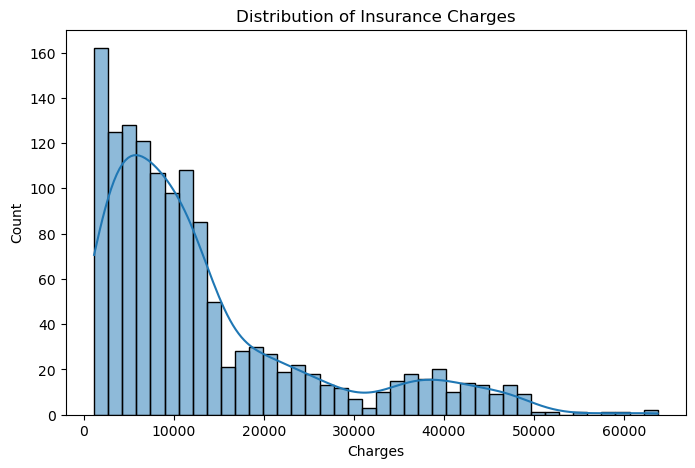

In [6]:
features = ["age", "sex", "bmi", "children", "smoker", "region"]
target = "charges"
df2 = df[features + [target]].dropna()

plt.figure(figsize=(8,5))
sns.histplot(df["charges"], bins=40, kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

C:\Users\preze\AppData\Local\Temp\ipykernel_33272\1064016492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_charges, x="children", y="charges", palette="viridis")


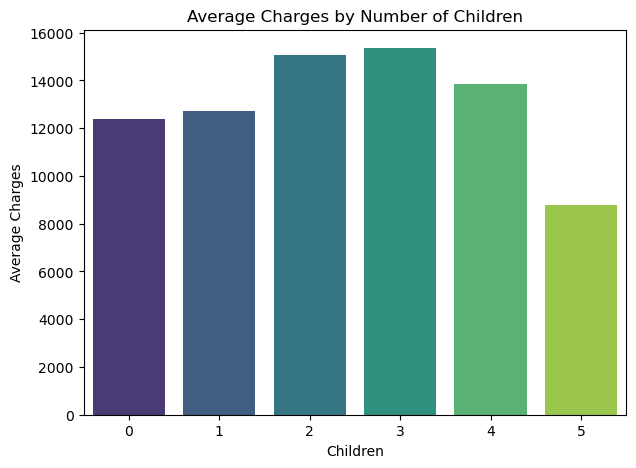

In [8]:
avg_charges = df.groupby("children")["charges"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_charges, x="children", y="charges", palette="viridis")
plt.title("Average Charges by Number of Children")
plt.xlabel("Children")
plt.ylabel("Average Charges")
plt.show()

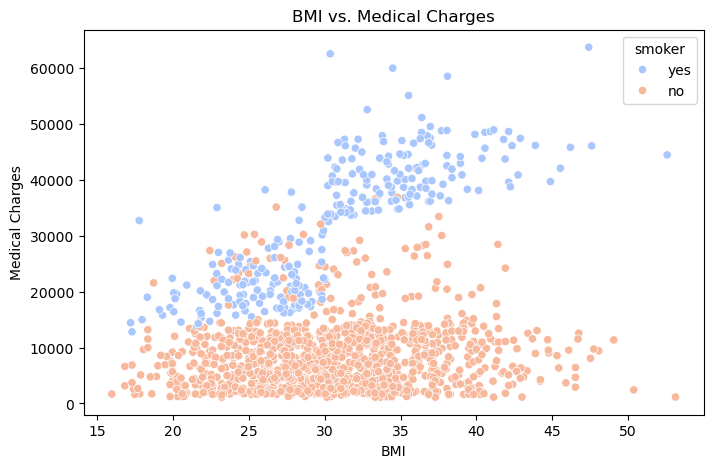

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker", palette="coolwarm")
plt.title("BMI vs. Medical Charges")
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.show()

C:\Users\preze\AppData\Local\Temp\ipykernel_33272\2076141345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="charges", data=avg_charges_region, palette="viridis")


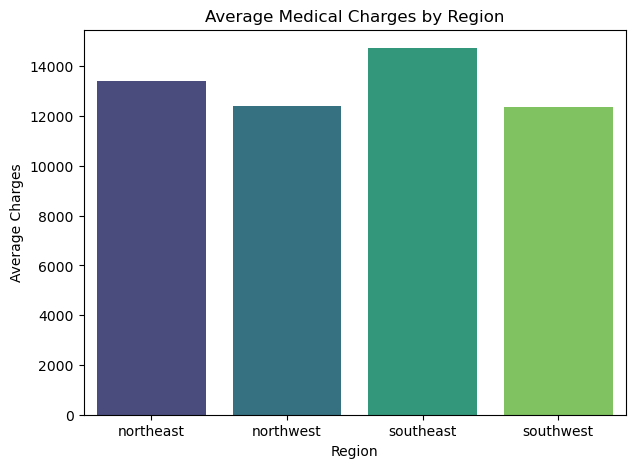

Average Charges by Region:
   index     region       charges
0      0  northeast  13406.384516
1      1  northwest  12417.575374
2      2  southeast  14735.411438
3      3  southwest  12346.937377


In [26]:
avg_charges_region = df.groupby("region")["charges"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x="region", y="charges", data=avg_charges_region, palette="viridis")
plt.title("Average Medical Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.show()

print("Average Charges by Region:")
print(avg_charges_region.reset_index())

C:\Users\preze\AppData\Local\Temp\ipykernel_33272\3806240127.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="smoker", y="charges", data=avg_charges_smoker, palette="magma")


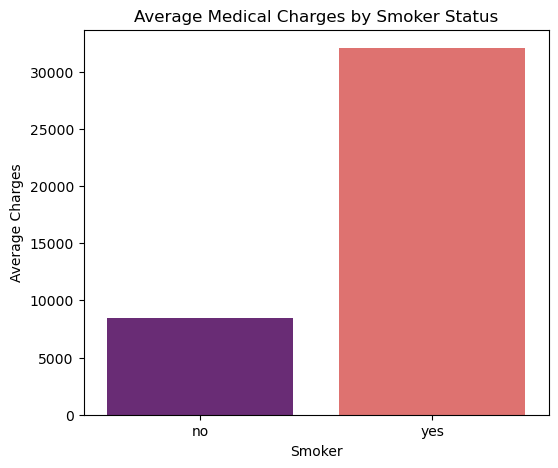

In [14]:
avg_charges_smoker = df.groupby("smoker")["charges"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="smoker", y="charges", data=avg_charges_smoker, palette="magma")
plt.title("Average Medical Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()

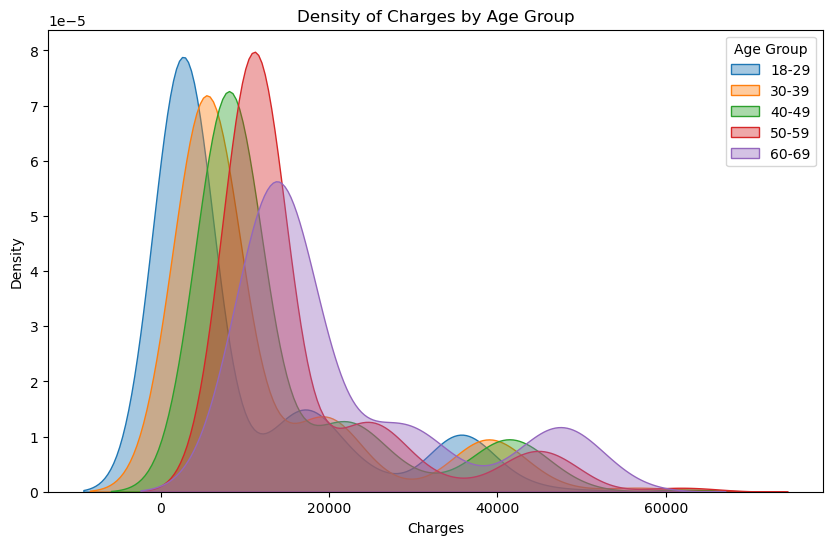

In [22]:
bins = [18, 30, 40, 50, 60, 70]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
for group in labels:
    subset = df[df["age_group"] == group]
    sns.kdeplot(subset["charges"], label=group, fill=True, alpha=0.4)

plt.title("Density of Charges by Age Group")
plt.xlabel("Charges")
plt.ylabel("Density")
plt.legend(title="Age Group")
plt.show()

C:\Users\preze\AppData\Local\Temp\ipykernel_33272\2079448348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="charges", data=avg_charges_sex, palette="pastel")


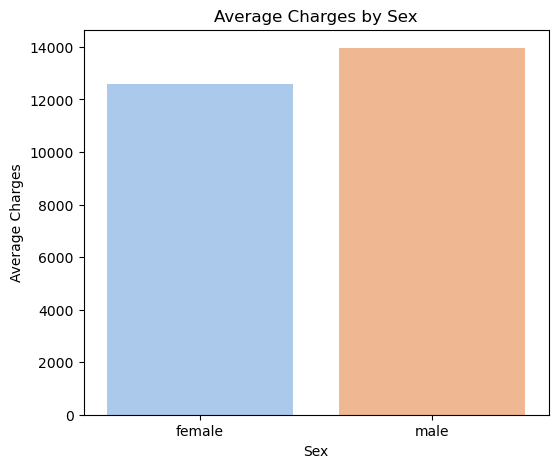

In [24]:
avg_charges_sex = df.groupby("sex")["charges"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="sex", y="charges", data=avg_charges_sex, palette="pastel")
plt.title("Average Charges by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Charges")
plt.show()

Smoking and body mass index (BMI) seemed to by far be the most related features to the target variable. When individuals that claimed to smoke or individuals with a BMI above 30 needed medical assistance, their charges saw a spike that other features were nowhere close to showing. Meanwhile, sex and region seemed to have the least influence on the target variable. The largest difference between both graphs was seen in the "Average Medical Charges by Region" visualization, with a difference of less than 3k. The big picture conclusion that can be drawn from the data graphs is that: partaking in harmful recreational activities (such as smoking) that have adverse affects on your health 1) causes your medical expenses to be much higher on average, and 2) make your insurance company much less willing to cover medical charges, regardless of cost. 